## PCA Projection with Physiochemical Descriptors

This notebook demostrates how we can use precomputed chemcial descriptors for visualization and model building. In this tutorial, we will show how to visualize chemical space using PCA projections on precomputed `B3DB` dataset.

This notebook can also be accessed with [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/theochem/B3DB/main?filepath=notebooks%2FPCA_projection_descriptors.ipynb)

In [1]:
# only run this cell if you are running this notebook in mybinder cloud
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import selfies as sf

In [2]:
# data file name for BBB dataset with categorical data
bbb_fpath = "../B3DB/B3DB_classification_extended.tsv.gz"
# load data
df = pd.read_csv(bbb_fpath, sep="\t", compression="gzip")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,...,10.171643,63.201012,398.068491,9.477821,2428,42,144,165,9.590278,6.097222
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,...,10.893010,87.033695,520.101247,9.287522,4114,62,194,237,13.756944,7.916667
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,...,9.618402,44.825548,304.910439,16.939469,218,21,68,81,4.805556,2.861111
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,...,9.201199,50.610337,341.030979,9.743742,898,22,82,88,6.583333,4.694444
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,...,10.992336,85.350582,461.168581,7.686143,2850,74,198,254,11.229167,6.847222


In [4]:
df_descriptors = df.iloc[:, 12:]

In [5]:
df_descriptors.describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,7807.000000,7807.000000,7807.000000,7807.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,...,7807.000000,7807.000000,7807.000000,7807.000000,7.807000e+03,7807.000000,7807.000000,7807.000000,7800.000000,7807.000000
mean,20.936784,16.974609,0.214935,0.677597,34.032968,2.499863,4.945133,34.032968,1.260908,4.133128,...,10.211636,70.859232,385.035739,7.616997,6.099932e+07,47.132573,144.137313,173.705521,9.912709,5.883298
std,9.441971,6.706245,0.585430,0.929318,15.044475,0.182698,0.350716,15.044475,0.073117,0.456915,...,0.834547,17.515823,170.733951,2.415272,4.310903e+09,26.063792,66.774481,83.349697,5.129713,2.597268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,...,0.000000,1.000000,7.016005,3.206260,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,15.492048,13.041353,0.000000,0.000000,25.572188,2.409622,4.776882,25.572188,1.236423,3.930254,...,9.888374,59.910817,285.079568,6.660752,7.820000e+02,31.000000,104.000000,121.000000,6.633681,4.416667
50%,19.993908,16.150871,0.000000,1.000000,32.595631,2.500142,4.958639,32.595631,1.264957,4.179205,...,10.310452,71.730916,362.103335,7.243813,1.541000e+03,43.000000,138.000000,165.000000,8.701389,5.569444
75%,24.743058,19.811292,0.000000,1.000000,39.888683,2.628402,5.148124,39.888683,1.302207,4.390999,...,10.721967,80.982453,451.264213,8.102851,2.709000e+03,59.000000,174.000000,212.500000,11.944444,6.777778
max,103.849824,79.433831,8.000000,10.000000,169.080886,2.982174,5.754004,169.080886,1.406591,5.810456,...,11.953120,196.846273,1881.070533,131.904154,3.782000e+11,261.000000,716.000000,862.000000,53.444444,30.222222


In [6]:
# preprocessing data

# remove descriptors with more than 25 nan values
df_descriptors = df_descriptors[df_descriptors.columns[df_descriptors.isnull().sum(axis=0) <= 25]]
# fill nan with zeros
df_descriptors = df_descriptors.fillna(0, inplace=False)
# standarize data
arr_descriptors = preprocessing.StandardScaler().fit_transform(df_descriptors.to_numpy())

<IPython.core.display.Javascript object>


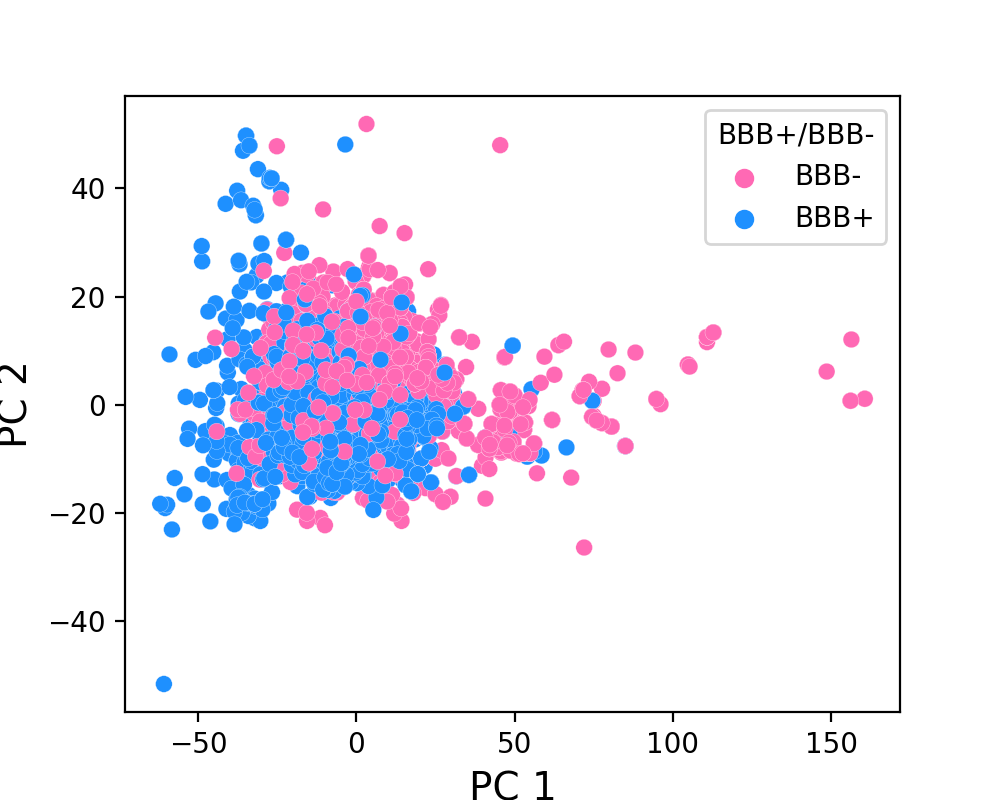

Text(0, 0.5, 'PC 2')

In [54]:
# visualization chemcial space using PCA
%matplotlib notebook

fig = plt.figure(figsize=(5, 4))

pca = PCA(n_components=2)
arr_embedded = pca.fit_transform(arr_descriptors)
df["PC_1"] = arr_embedded[:, 0]
df["PC_2"] = arr_embedded[:, 1]

sns.scatterplot(data=df, x="PC_1", y="PC_2",
                hue="BBB+/BBB-",
                palette=sns.color_palette(["hotpink", "dodgerblue"]),
                linewidth=0.1,
                )
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
# plt.savefig("pca_projection_descriptors.png", dpi=300)

In [8]:
import rdkit.Chem as Chem

def does_contain_fg(smile, fg, amount=False, in_ring=0):
    mol = Chem.MolFromSmiles(smile)
    func_group = Chem.MolFromSmarts(fg)
    if not amount:
        return len(mol.GetSubstructMatches(func_group)) > 0
    return len(mol.GetSubstructMatches(func_group))

def ring_info(smile, n_atoms, amount=False):
    mol = Chem.MolFromSmiles(smile)
    ri = mol.GetRingInfo()
    rings = ri.AtomRings()
    rings_lengts = [len(ring) for ring in rings]
    number_current_rings = sum([elem for elem in rings_lengts if elem == n_atoms])/n_atoms
    if not amount:
        return number_current_rings>0
    return number_current_rings
    

smile = 'C1=CC(=C(C=C1C(CN)O)O)O'
mol = Chem.MolFromSmiles(smile)
c_at = "[#6]"
o_at = "[#8]"
n_at = "[#7]"
ring_3 = '[r3]'
ring_4 = '[r4]'
ring_5 = '[r5]'
ring_6 = '[r6]'
alc_group = "[#6][OX2H]"
alc_group_end = "C[OX2H]"
ket_group = '[#6][CX3](=O)[#6]'
carbonyl = '[CX3]=[OX1]'
aldehyde = '[CX3H1](=O)[#6]'
amide = '[NX3][CX3](=[OX1])[#6]'
pr_sec_amine = '[NX3;H2,H1;!$(NC=O)]'
alk_carb = "[CX4]"
phenol = '[OH]c1ccccc1'
sulfide = '[SX2]'
thiol = '[SX2H]'
nh_aliphatic = '[C][NX3H][C]'
chlorine = '[Cl]C'
iodate = '[#53]C'
oh_c_o = '[OX2H][C](=[OX2])'
carboxilic_acis = '[CX3](=O)[OX2H1]'


does_contain_fg(smile, alc_group)

lst_features = [c_at, o_at, n_at, ring_3, ring_4, ring_5, ring_6, alc_group, alc_group_end,
                ket_group, carbonyl, aldehyde, amide, pr_sec_amine, alk_carb,
                phenol, sulfide, thiol, chlorine, iodate, oh_c_o, carboxilic_acis, nh_aliphatic]
for i, feature in enumerate(lst_features):
    if 3<=i<=6:
        df[f'feature_{i}'] = df.SMILES.apply(ring_info, args=(i, True))
    else:
        df[f'feature_{i}'] = df.SMILES.apply(does_contain_fg, args=(feature, True))
    
df[f'feature_{i}'] = df[f'feature_{i}'][(df['feature_7']<=2)&(df['feature_9']<=2)]
# df[f'feature_{i+1}'].fillna(99)


In [9]:
df['feature_22']

0       0.0
1       NaN
2       0.0
3       2.0
4       NaN
       ... 
7802    1.0
7803    0.0
7804    0.0
7805    0.0
7806    0.0
Name: feature_22, Length: 7807, dtype: float64

## Using SELFIES

In [11]:
smiles = df.SMILES.to_list()
selfies = [sf.encoder(smile) for smile in smiles]
alphabet = sf.get_alphabet_from_selfies(selfies)
alphabet.add("[nop]")  # [nop] is a special padding symbol
alphabet = list(sorted(alphabet)) 

pad_to_len = max(sf.len_selfies(s) for s in selfies)  # 5
symbol_to_idx = {s: i for i, s in enumerate(alphabet)}

# dimethyl_ether = '[C][O][C]'
test_selfie = selfies[2]

label, one_hot = sf.selfies_to_encoding(
   selfies=test_selfie,
   vocab_stoi=symbol_to_idx,
   pad_to_len=pad_to_len,
   enc_type="both"
)


In [12]:
label

[62,
 45,
 21,
 36,
 45,
 48,
 45,
 21,
 36,
 45,
 46,
 45,
 21,
 45,
 21,
 58,
 21,
 65,
 58,
 65,
 19,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,


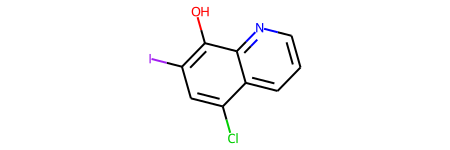

In [12]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

mol = Chem.MolFromSmiles(smiles[2])

alphabet_arr = np.array(alphabet)
label = np.where(np.array(one_hot) == 1)[1]
reconstracted_selfie = alphabet_arr[label]
merged_selfie = ''.join(alphabet_arr[label][np.where(alphabet_arr[label] != '[nop]')].tolist())

decoded_smile = sf.decoder(merged_selfie)
mol_decoded = Chem.MolFromSmiles(decoded_smile)

mol_decoded

In [ ]:
mol

In [76]:
def calc_response(key):
    unique_vals = np.unique(df[key].values)
    derivatives = []
    y = df.logBB
    
    max_y = []
    min_y = []
    for i in range(1, len(unique_vals)):
        mask_up = df[key] == unique_vals[i]
        mask_down = df[key] == unique_vals[i-1]
        der = (np.mean(y[mask_up].dropna(axis=0).values)-np.mean(y[mask_down].dropna(axis=0).values))/(unique_vals[i]-unique_vals[i-1])
        derivatives.append(der)
        
        der = np.float_(der)
        if not np.isnan(der):
            max_y.append(np.max(y[mask_down].dropna(axis=0).values))
            min_y.append(np.min(y[mask_down].dropna(axis=0).values))
            
    mean_der = np.nanmean(derivatives)
#     print(derivatives)
    return mean_der#*(np.max(unique_vals)-np.min(unique_vals))/(np.max(max_y)-np.min(min_y))

for i in range(len(lst_features)):
    resp = calc_response(f'feature_{i}')
    print(resp, lst_features[i], i)


-0.022086363636363633 [#6] 0
-0.05646683673469387 [#8] 1
-0.0031197816313423246 [#7] 2
-0.2048936170212766 [r3] 3
-0.7611998716714788 [r4] 4
-0.2524815430047988 [r5] 5
-0.04477088948787063 [r6] 6
-0.13875462962962962 [#6][OX2H] 7
-0.19231014873140853 C[OX2H] 8
-0.19034600890715994 [#6][CX3](=O)[#6] 9
-0.03388377926421406 [CX3]=[OX1] 10
nan [CX3H1](=O)[#6] 11
-0.12938461538461532 [NX3][CX3](=[OX1])[#6] 12
-0.2384147780925401 [NX3;H2,H1;!$(NC=O)] 13
0.08137084398976983 [CX4] 14
-0.24117602040816324 [OH]c1ccccc1 15
0.11694380733944958 [SX2] 16
nan [SX2H] 17
0.10817961165048544 [Cl]C 18
1.2101609848484847 [#53]C 19
nan [OX2H][C](=[OX2]) 20
-0.800290736984449 [CX3](=O)[OX2H1] 21
-0.11493656968876861 [C][NX3H][C] 22


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/gf/7vfqp7nn2972hrcz727tkjkh0000gn/T/ipykernel_89862/2616076716.py:19: RuntimeWarning: Mean of empty slice
  mean_der = np.nanmean(derivatives)


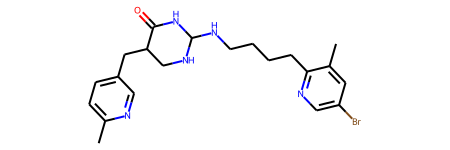

In [15]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

mol = Chem.MolFromSmiles(df.SMILES[df.feature_1==1].iloc[2])
mol

In [16]:
df[df.feature_19>=1]

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22
1022,1023,i-4 (44cyanophenoxymethylpiperidineniodoallyl),4-[[1-[(e)-3-iodoprop-2-enyl]piperidin-4-yl]me...,N#Cc1ccc(OCC2CCN(C/C=C/I)CC2)cc1,9864749.0,1.13,BBB+,InChI=1S/C16H19IN2O/c17-8-1-9-19-10-6-15(7-11-...,NaN,R2|R2|R8|R21|R27|R43|R46|R47|R40|R25|R41|R38|,...,0,7,0,0,0,0,1,0,0,0.0
1023,1024,i-4 (44cyanophenoxymethylpiperidineniodoallyl),4-[[1-(3-iodoprop-2-enyl)piperidin-4-yl]methox...,N#Cc1ccc(OCC2CCN(CC=CI)CC2)cc1,78391575.0,1.13,BBB+,InChI=1S/C16H19IN2O/c17-8-1-9-19-10-6-15(7-11-...,NaN,R27|R3|,...,0,7,0,0,0,0,1,0,0,0.0
4664,4665,sodiumamidotrizoate,NaN,CC(=O)NC1C(I)C(NC(C)=O)C(I)C(C(=O)O)C1I,44228116.0,NaN,BBB-,InChI=1S/C11H15I3N2O4/c1-3(17)15-9-6(12)5(11(1...,-1.0,R28|R9|R27|R36|,...,0,8,0,0,0,0,3,0,1,2.0
5870,5871,haloprogin,"1,2,4-trichloro-5-(3-iodoprop-2-ynoxy)benzene",Clc1cc(Cl)c(OCC#CI)cc1Cl,3561.0,NaN,BBB-,InChI=1S/C9H4Cl3IO/c10-6-4-8(12)9(5-7(6)11)14-...,NaN,R23|,...,0,1,0,0,0,0,1,0,0,0.0


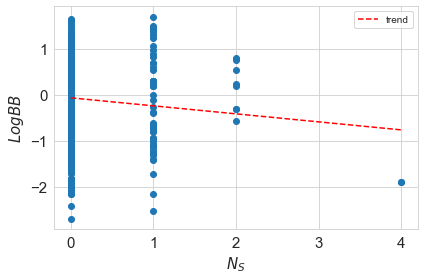

In [73]:
# x = df.feature_6[(df.feature_22>0)&(df.feature_5>0)].values
# y = df.logBB[(df.feature_22>0)&(df.feature_5>0)]
import matplotlib

sns.set_style("whitegrid")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
x = df.feature_16.values
y = df.logBB.values

bad_inds = np.where(np.isnan(y))
y = np.delete(y, bad_inds)
x = np.delete(x, bad_inds)

plt.scatter(x[x<20], y[x<20])

z = np.polyfit(x[x<20], y[x<20], 1)
p = np.poly1d(z)

plt.plot(np.sort(x[x<20]), p(np.sort(x[x<20])), c='r', ls='--', label='trend')
plt.ylabel("$Log{BB}$", size=15)
plt.xlabel(r"$N_{S}$", size=15)
plt.legend()

# plt.xticks(size=15)
# plt.yticks(size=15)
plt.tight_layout()
plt.savefig("S_bb.png", dpi=500)
plt.show()
# plt.scatter(x, y);
# plt.show();

In [35]:
y

array([-2.69, -2.52, -2.4 , ...,  1.6 ,  1.64,  1.7 ])

In [18]:
np.unique(df.feature_9.values)

array([0, 1, 2, 3, 4])

In [ ]:
from rdkit.Chem import MCS
permeable = df.SMILES[df['BBB+/BBB-'] == 'BBB+'].values
mols = [Chem.MolFromSmiles(smile) for smile in permeable]
MCS.FindMCS(mols, atomCompare="any")

# Checking if there are NH in aromatic rings

In [192]:
does_contain_fg(df.SMILES.iloc[15], '[nH;R]', amount=True)

0

In [148]:
df.SMILES.iloc[5]

'CS(=O)(=O)N(CCO)c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[nH]c12'

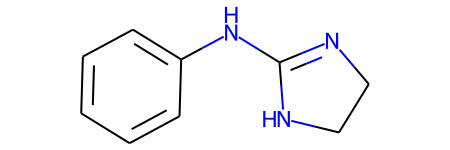

In [191]:
molecules_lst[15].mol

In [197]:
class Molecule():
    def __init__(self, smile, permeability):
        self.smile = smile
        self.mol = Chem.MolFromSmiles(smile)
        self.permeability = permeability
        
    def rings_info(self):
        self.ri = self.mol.GetRingInfo()
        self.rings = self.ri.AtomRings()

        self.rings_guts = [{}, {}, {}, {}, {}, {}, {}]
        for ring in self.rings:
            n_atoms = len(ring)
            if n_atoms<=6:
                for atom_id in ring:
                    atom = self.mol.GetAtomWithIdx(atom_id)
                    atom_type = atom.GetSymbol()

                    if atom_type == 'N':
                        neighbors = [x.GetAtomicNum() for x in atom.GetNeighbors()]
#                         print(atom.GetExplicitValence())
                        if len(neighbors) == 2:
                            self.rings_guts[n_atoms][atom_type] = self.rings_guts[n_atoms].get(atom_type, 0)+1
                        
                    else:
                        self.rings_guts[n_atoms][atom_type] = self.rings_guts[n_atoms].get(atom_type, 0)+1
        
        
            
                
                
molecules_lst = []
for smile, permeability in df[['SMILES', 'logBB']].values:
#     if len(molecules_lst)>5:
#         break
    molecule = Molecule(smile, permeability)
    molecule.rings_info()
    molecules_lst.append(molecule)

[{}, {}, {}, {}, {}, {}, {'C': 10, 'N': 2}]


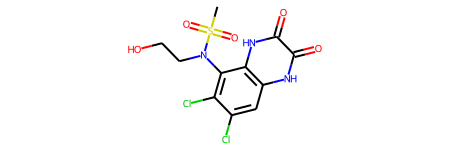

In [133]:
print(molecules_lst[5].rings_guts)
molecules_lst[5].mol

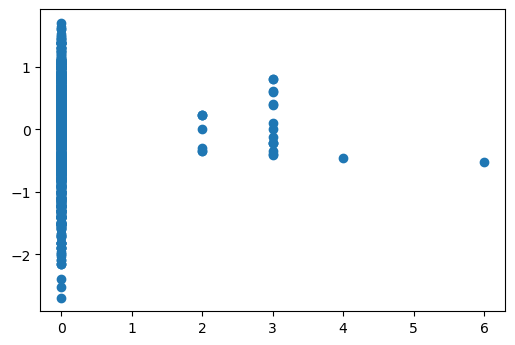

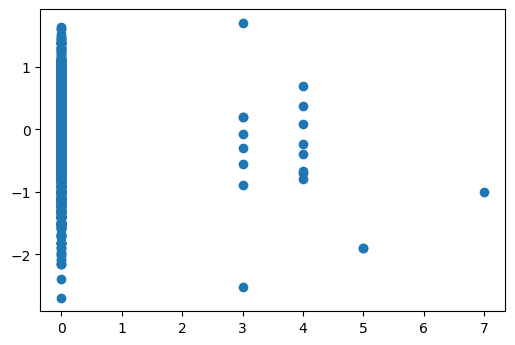

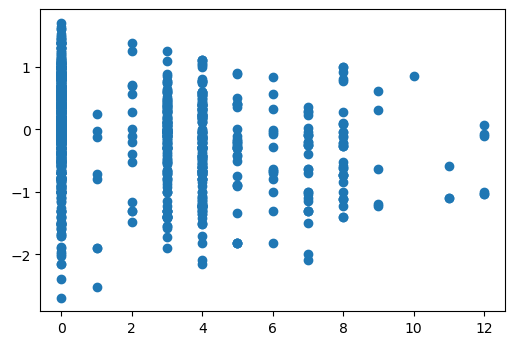

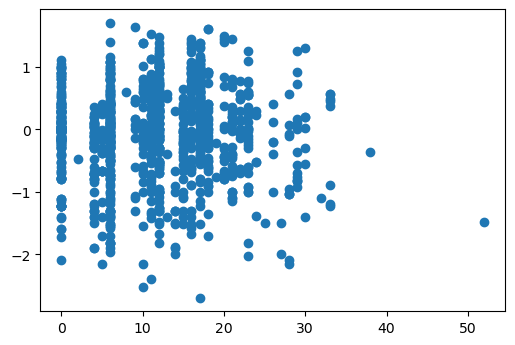

In [214]:
for i in range(3, 7):
    x = np.array([mol.rings_guts[i]['C'] if 'C' in mol.rings_guts[i] else 0 for mol in molecules_lst])
    y = np.array([mol.permeability for mol in molecules_lst])
    
    df[f'feature_{22+i-2}'] = x
    plt.figure(dpi=100)
    plt.scatter(x, y)
    plt.show();

In [77]:
responces = []
for i in range(len(lst_features)+4):
    resp = calc_response(f'feature_{i}')
#     print(resp, lst_features[i], i)
    print(resp, i)
    responces.append([resp, i])

-0.022086363636363633 0
-0.05646683673469387 1
-0.0031197816313423246 2
-0.2048936170212766 3
-0.7611998716714788 4
-0.2524815430047988 5
-0.04477088948787063 6
-0.13875462962962962 7
-0.19231014873140853 8
-0.19034600890715994 9
-0.03388377926421406 10
nan 11
-0.12938461538461532 12
-0.2384147780925401 13
0.08137084398976983 14
-0.24117602040816324 15
0.11694380733944958 16
nan 17
0.10817961165048544 18
1.2101609848484847 19
nan 20
-0.800290736984449 21
-0.11493656968876861 22


/var/folders/gf/7vfqp7nn2972hrcz727tkjkh0000gn/T/ipykernel_89862/2616076716.py:19: RuntimeWarning: Mean of empty slice
  mean_der = np.nanmean(derivatives)


KeyError: 'feature_23'

In [1]:
responces.sort(key=lambda x: x[0])
responces[:3], responces[-5:]

for resp, i in responces[:6] + responces[-6:]:
    print(resp, lst_features[i])

NameError: name 'responces' is not defined

In [ ]:
pr

# Genetics algorithm

In [ ]:
import numpy as npz
from multiprocessing.dummy import Pool

def mutate_one_hot(one_hot, mutation_rate):
    n_features = one_hot.shape[1]
    candidates = np.random.randint(0, n_features,
                                   size=one_hot.shape[0])
    
    mutated_one_hot = one_hot.copy()
    mutation_mask = np.random.rand(*candidates.shape)<mutation_rate
    
    mutated_inds = candidates[mutation_mask]
    for row_ind, gene_ind in zip(np.where(mutation_mask)[0], 
                                 mutated_inds):
        mutated_one_hot[row_ind] = np.zeros(one_hot.shape[1])
        mutated_one_hot[row_ind, gene_ind] = 1
    return mutated_one_hot


def get_permeability_pred(flattened_one_hot, n_genes=235, return_smile=False):
    one_hot = flattened_one_hot.reshape(n_genes, -1)
    alphabet_arr = np.array(alphabet)
    label = np.where(np.array(one_hot) == 1)[1]
    
#     print(flattened_one_hot.shape)
    reconstracted_selfie = alphabet_arr[label]
    merged_selfie = ''.join(alphabet_arr[label][np.where(alphabet_arr[label] != '[nop]')].tolist())

    decoded_smile = sf.decoder(merged_selfie)
    
    if return_smile:
        return predict_permeability([decoded_smile]), decoded_smile
    
    predicted = predict_permeability([decoded_smile])
    return predicted[0]
    

class GeneticModel:
    def __init__(self, crossover_rate, mutation_rate,
                 n_mutations = None, 
                 n_species=500,
                 func=None,
                 n_parents=10,
                 n_genes = None):
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.n_mutations = n_mutations
        self.n_species = n_species
        self.population = None
        self.initial = None
        self.func = func
        self.n_parents=n_parents
        self.n_genes = n_genes
        self.history = None
        
    def mutate(self, population):
        mutation_genes = np.random.rand(*population.shape)
        mutation_genes = mutation_genes<self.mutation_rate
        mutated_population = population.copy()
        mutated_population[np.logical_and(mutation_genes, population==0)] = 1
        mutated_population[np.logical_and(mutation_genes, population==1)] = 0
        
        self.population = mutated_population
        return mutated_population
    
    def mutate_2d(self, population, n_genes):
        mutated_population = []
        
        for elem in population:
            mutated_elem = mutate_one_hot(elem.reshape(n_genes, -1), self.mutation_rate)
            mutated_population.append(mutated_elem.flatten())
            
        self.population = np.array(mutated_population)
        return np.array(mutated_population)
    
    def select(self, scores):
        best_args = np.argsort(scores)[-self.n_parents:]
        return self.population[best_args]
    
    def crossover(self, selected):
        offspings = []
        n_genes = selected.shape[1]
        for i in range(len(selected)//2):
            parent_1 = selected[i]
            parent_2 = selected[self.n_parents-1-i]
            offsping = np.hstack([parent_1[:n_genes//2], parent_2[n_genes//2:]])
            offspings.append(offsping)
        return offspings
    
    def populate(self, candidates, scores):
        probs = np.array(scores)/np.sum(scores)
        
        population_inds = np.random.choice(candidates.shape[0], self.n_species, p=probs)
        population = candidates[population_inds]
        self.population = population
        return population
    
    def run_selection(self, species, n_runs=2000):
        self.history = []
        func = self.func
        
        if self.initial is None:
            self.initial = species
            scores = [func(species)]
            
            self.populate(species, scores) 
            scores = [scores[0] for i in range(self.n_species)]
        else:
            scores = [func(elem) for elem in self.population]
        
        for i in range(n_runs):
            print(f"=======> {i+1}")
            print(self.population, i)
            scores = [func(elem) for elem in self.population]
            print(scores)
            best_species = self.select(scores)
            print(best_species)
            offsprings = self.crossover(best_species)
            
            pool = Pool()
            offspings_scores = [func(offsping) for offsping in offsprings]
            

            new_candidates = np.vstack([best_species[-self.n_parents//2: ],
                                        offsprings])
            new_score = sorted(scores)[-self.n_parents//2:]+offspings_scores
            
            self.history.append((new_candidates, new_score))

            new_population = self.populate(new_candidates, new_score)
            if i != n_runs-1:
                new_population = self.mutate_2d(new_population, self.n_genes)
#                 new_population = self.mutate(new_population)
            
            if not i%n_runs//5:
                print(best_species[-5:], sorted(scores)[-5:], scores[0])
            
        return new_candidates, new_score
        

In [ ]:
print(f'Hi there {5}')

## Toy example

In [ ]:
df.iloc[0].SMILES

In [ ]:
model = GeneticModel(0.5, 0.01, n_species=10, func=lambda x: +np.sum(x[:2])-np.sum(x[-3:]) + 4, n_parents=8)
candidate = np.hstack([np.zeros((1, 5)), np.ones((1, 5))])
scores = model.func(candidate)
res = model.run_selection(candidate, n_runs=100)

In [ ]:
res

In [ ]:
import matplotlib.pyplot as plt 

plt.hist(np.sum(res[:, :2], axis=1)-np.sum(res[:, -3:], axis=1)+4)

After selection it's a good idea to find the most common substructure

## Testing the real example

In [ ]:
test_one_hot = np.array(one_hot)

# mutate_one_hot(test_one_hot, 0.9)[:2]
real_shape = test_one_hot.shape
population = np.array([test_one_hot.flatten()])
model = GeneticModel(0.5, 0.005, n_species=20, n_genes=235,func=get_permeability_pred, n_parents=4)

res = model.run_selection(population, n_runs=10)

# pred, smile_mutated = get_permeability_pred(tmp[0], n_genes=235, return_smile=True)

In [ ]:
res

In [ ]:
model.population

In [ ]:
get_permeability_pred(res[0][1], n_genes=235, return_smile=True)

In [ ]:
res_check = model.history[-9]
res_check

In [ ]:
get_permeability_pred(res_check[0][0], n_genes=235)

In [ ]:
import pickle

# with open('smiles_2_new.pickle', 'wb') as f:
#     pickle.dump(model.history, f)

In [ ]:
# new = res[0][2].reshape(test_one_hot.shape)
new = res_check[0][1].reshape(test_one_hot.shape)
# new = test_one_hot
new = alphabet_arr[np.where(new ==1)[1]].tolist()
# new = new[np.where(new != "'[nop]'")].tolist()
new = Chem.MolFromSmiles(sf.decoder(''.join(new)))
# sf.decoder(''.join(*new))
# ''.join(*new)
new

In [ ]:
import os
import pandas as pd
from joblib import load
from padelpy import from_smiles
# !pip install xgboost==1.5.0
# !pip uninstall xgboost==1.6.0

def get_clf(clf_str, sampling_str):
    """Get b3clf fitted classifier
    """
    clf_list = ["dtree", "knn", "logreg", "xgb"]
    sampling_list = ["borderline_SMOTE", "classic_ADASYN",
                     "classic_RandUndersampling", "classic_SMOTE", "kmeans_SMOTE", "common"]

    # This could be moved to an initial check method for input parameters
    if clf_str not in clf_list:
        raise ValueError(
            "Input classifier is not supported; got {}".format(clf_str))
    elif sampling_str not in sampling_list:
        raise ValueError(
            "Input sampling method is not supported; got {}".format(sampling_str))

#     dirname = os.path.dirname(__file__)
    dirname = '..'
    # Move data to new storage place for packaging
    clf_path = os.path.join(
        dirname, "pre_trained", "b3clf_{}_{}.joblib".format(clf_str, sampling_str))

    clf = load(clf_path)

    return clf


def predict_permeability(smiles):
    try:
        descriptors = pd.DataFrame(from_smiles(smiles, fingerprints=False, descriptors=True))
    except:
        return [0]
    descriptors.replace([-np.inf, np.inf], np.nan, inplace=True)
    descriptors.dropna(axis=0, inplace=True)
    
    descriptors.replace([''], 0, inplace=True)
    descriptors = descriptors[features]
    try:
        descriptors_scaled = scaler.transform(descriptors)
    except:
        return [0]
    
    return clf.predict_proba(descriptors_scaled)[:, 1]

clf = get_clf('xgb', 'borderline_SMOTE')
scaler = load('../pre_trained/b3clf_scaler.joblib')

with open('../feature_list.txt', 'r') as f:
    features = f.read().splitlines()
    
test_smiles = ['O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O',
               'CCCC',
               'COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)COC21']
random_inds = np.random.choice(df.logBB[df.logBB.notna()].index.values,
                               size=10)
test_smiles = df.SMILES.iloc[random_inds].tolist()
# descriptors = predict_permeability(test_smiles)
# descriptors_scaled = scaler.transform(descriptors)

# clf.predict_proba(descriptors_scaled)
predict_permeability(test_smiles)

In [ ]:
print(df.logBB.iloc[random_inds])

In [ ]:
plt.scatter(clf.predict_proba(descriptors_scaled)[:, 1], df.logBB.iloc[random_inds])
# plt.xlim(0.6, 1)

In [ ]:
descriptors = from_smiles('CCC')
descriptors

In [ ]:
population = np.zeros((1, 18))#.reshape(-1, 3, 1)
# n_species = 10
# probs = np.ones(1)
# np.random.choice(candidates.shape[0], n_species, p=probs)

mutation_genes = np.random.rand(*population.shape).reshape(-1, 3)
print(np.where(mutation_genes<0.1))
mutation_genes

In [ ]:
n_samples = 10
np.random.randint(0, 6, size=(10, 3))+np.array([6*i for i in range(3)])

In [ ]:
np.array([3*i for i in range(1, 4)])

In [ ]:
np.unique([1, 2, 3, 2, 3, 1])

In [ ]:
# %%writefile modify_mols.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import selfies as sf
import os
import pickle
from joblib import load
from padelpy import from_smiles

def mutate_one_hot(one_hot, mutation_rate):
    n_features = one_hot.shape[1]
    candidates = np.random.randint(0, n_features,
                                   size=one_hot.shape[0])
    
    mutated_one_hot = one_hot.copy()
    mutation_mask = np.random.rand(*candidates.shape)<mutation_rate
    
    mutated_inds = candidates[mutation_mask]
    for row_ind, gene_ind in zip(np.where(mutation_mask)[0], 
                                 mutated_inds):
        mutated_one_hot[row_ind] = np.zeros(one_hot.shape[1])
        mutated_one_hot[row_ind, gene_ind] = 1
    return mutated_one_hot


def get_permeability_pred(flattened_one_hot, n_genes=235, return_smile=False):
    one_hot = flattened_one_hot.reshape(n_genes, -1)
    alphabet_arr = np.array(alphabet)
    label = np.where(np.array(one_hot) == 1)[1]
    reconstracted_selfie = alphabet_arr[label]
    merged_selfie = ''.join(alphabet_arr[label][np.where(alphabet_arr[label] != '[nop]')].tolist())

    decoded_smile = sf.decoder(merged_selfie)
    
    if return_smile:
        return predict_permeability([decoded_smile]), decoded_smile
    
    predicted = predict_permeability([decoded_smile])
    return predicted[0]


def get_clf(clf_str, sampling_str):
    """Get b3clf fitted classifier
    """
    clf_list = ["dtree", "knn", "logreg", "xgb"]
    sampling_list = ["borderline_SMOTE", "classic_ADASYN",
                     "classic_RandUndersampling", "classic_SMOTE", "kmeans_SMOTE", "common"]

    # This could be moved to an initial check method for input parameters
    if clf_str not in clf_list:
        raise ValueError(
            "Input classifier is not supported; got {}".format(clf_str))
    elif sampling_str not in sampling_list:
        raise ValueError(
            "Input sampling method is not supported; got {}".format(sampling_str))

    dirname = '..'
    # Move data to new storage place for packaging
    clf_path = os.path.join(
        dirname, "pre_trained", "b3clf_{}_{}.joblib".format(clf_str, sampling_str))

    clf = load(clf_path)

    return clf


def predict_permeability(smiles):
    try:
        descriptors = pd.DataFrame(from_smiles(smiles, fingerprints=False, descriptors=True))
    except:
        return [0]
    descriptors.replace([-np.inf, np.inf], np.nan, inplace=True)
    descriptors.dropna(axis=0, inplace=True)
    
    descriptors.replace([''], 0, inplace=True)
    descriptors = descriptors[features]
    try:
        descriptors_scaled = scaler.transform(descriptors)
    except:
        return [0]
    
    return clf.predict_proba(descriptors_scaled)[:, 1]



class GeneticModel:
    def __init__(self, crossover_rate, mutation_rate,
                 n_mutations = None, 
                 n_species=500,
                 func=None,
                 n_parents=10,
                 n_genes = None):
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.n_mutations = n_mutations
        self.n_species = n_species
        self.population = None
        self.initial = None
        self.func = func
        self.n_parents=n_parents
        self.n_genes = n_genes
        self.history = None
        
    def mutate(self, population):
        mutation_genes = np.random.rand(*population.shape)
        mutation_genes = mutation_genes<self.mutation_rate
        mutated_population = population.copy()
        mutated_population[np.logical_and(mutation_genes, population==0)] = 1
        mutated_population[np.logical_and(mutation_genes, population==1)] = 0
        
        self.population = mutated_population
        return mutated_population
    
    def mutate_2d(self, population, n_genes):
        mutated_population = []
        
        for elem in population:
            mutated_elem = mutate_one_hot(elem.reshape(n_genes, -1), self.mutation_rate)
            mutated_population.append(mutated_elem.flatten())
            
        self.population = np.array(mutated_population)
        return np.array(mutated_population)
    
    def select(self, scores):
        best_args = np.argsort(scores)[-self.n_parents:]
        return self.population[best_args]
    
    def crossover(self, selected):
        offspings = []
        n_genes = selected.shape[1]
        for i in range(len(selected)//2):
            parent_1 = selected[i]
            parent_2 = selected[self.n_parents-1-i]
            offsping = np.hstack([parent_1[:n_genes//2], parent_2[n_genes//2:]])
            offspings.append(offsping)
        return offspings
    
    def populate(self, candidates, scores):
        probs = np.array(scores)/np.sum(scores)
        
        population_inds = np.random.choice(candidates.shape[0], self.n_species, p=probs)
        population = candidates[population_inds]
        self.population = population
        return population
    
    def run_selection(self, species, n_runs=2000):
        self.history = []
        func = self.func
        
        if self.initial is None:
            self.initial = species
            scores = [func(species)]
            
            self.populate(species, scores) 
            scores = [scores[0] for i in range(self.n_species)]
        else:
            scores = [func(elem) for elem in self.population]
        
        for i in range(n_runs):
            print(f"=======> {i+1}")
#             print(self.population, i)
            scores = [func(elem) for elem in self.population]
            print(scores)
            best_species = self.select(scores)
            print(best_species)
            offsprings = self.crossover(best_species)
            
            offspings_scores = [func(offsping) for offsping in offsprings]
            

            new_candidates = np.vstack([best_species[-self.n_parents//2: ],
                                        offsprings])
            new_score = sorted(scores)[-self.n_parents//2:]+offspings_scores
            
            self.history.append((new_candidates, new_score))

            new_population = self.populate(new_candidates, new_score)
            if i != n_runs-1:
                new_population = self.mutate_2d(new_population, self.n_genes)
            
            if not i%n_runs//5:
                print(best_species[-5:], sorted(scores)[-5:], scores[0])
            
        return new_candidates, new_score
        


clf = get_clf('xgb', 'borderline_SMOTE')
scaler = load('../pre_trained/b3clf_scaler.joblib')

with open('../feature_list.txt', 'r') as f:
    features = f.read().splitlines()
    
test_smiles = ['O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O',
               'CCCC',
               'COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)COC21']

bbb_fpath = "../B3DB/B3DB_classification_extended.tsv.gz"
df = pd.read_csv(bbb_fpath, sep="\t", compression="gzip")


np.random.seed(42)
random_inds = np.random.choice(df.logBB[(df.logBB.notna()) & (df['BBB+/BBB-'] == 'BBB-')].index.values,
                               size=100)[10:20]

test_smiles = df.SMILES[(df.logBB.notna()) & (df['BBB+/BBB-'] == 'BBB-')].iloc[random_inds].tolist()
    
    
smiles = df.SMILES.to_list()
selfies = [sf.encoder(smile) for smile in smiles]
alphabet = sf.get_alphabet_from_selfies(selfies)
alphabet.add("[nop]")  # [nop] is a special padding symbol
alphabet = list(sorted(alphabet)) 

pad_to_len = max(sf.len_selfies(s) for s in selfies)  # 5
symbol_to_idx = {s: i for i, s in enumerate(alphabet)}

test_selfies = [sf.encoder(smile) for smile in test_smiles]

for k, test_selfie in zip(random_inds, test_selfies):
    print(k)
    label, one_hot = sf.selfies_to_encoding(selfies=test_selfie,
                                            vocab_stoi=symbol_to_idx,
                                            pad_to_len=pad_to_len,
                                            enc_type="both")
    
    test_one_hot = np.array(one_hot)

    real_shape = test_one_hot.shape
    population = np.array([test_one_hot.flatten()])
    model = GeneticModel(0.5, 0.005, n_species=20, n_genes=235,func=get_permeability_pred, n_parents=4)
    try:
        res = model.run_selection(population, n_runs=15)
    except:
        with open(f'smiles_{k}_error.pickle', 'wb') as f:
            pickle.dump(model.history, f)
        continue
        
    with open(f'smiles_{k}.pickle', 'wb') as f:
        pickle.dump(model.history, f)

In [ ]:
import pickle

with open(f'smiles_{k}.pickle', 'wb') as f:
        pickle.dump(model.history, f)

In [ ]:
df.logBB[(df.logBB.notna()) & (df['BBB+/BBB-'] == 'BBB-')]